In [139]:
import pandas as pd

In [140]:
df = pd.read_csv('car data.csv')

In [141]:
df.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [142]:
df.shape

(301, 9)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [144]:
# just finding out how many unique values there are in these columns
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [145]:
# check missing our null values
print(df.isnull().sum())
print(df.isna().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [146]:
df.duplicated().sum()

2

In [147]:
df = df.drop(columns=['Car_Name']) #this isn't gonna help determine outcome price

In [148]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [149]:
df['Year'] = abs(df['Year'] - 2020)

In [150]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,4,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,5,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,11,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,3,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [151]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(df[['Fuel_Type']]) # Fit encoder

df['Fuel_Type'] = encoder.transform(df[['Fuel_Type']]) #encode FuelType

In [152]:
encoder.fit(df[['Seller_Type']])# Fit encoder
df['Seller_Type'] = encoder.transform(df[['Seller_Type']])#encode Seller Type

encoder.fit(df[['Transmission']]) # Fit encoder
df['Transmission'] = encoder.transform(df[['Transmission']]) #encode Transmission

In [153]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,0.0,0.0,1.0,0
1,7,4.75,9.54,43000,1.0,0.0,1.0,0
2,3,7.25,9.85,6900,0.0,0.0,1.0,0
3,9,2.85,4.15,5200,0.0,0.0,1.0,0
4,6,4.60,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
296,4,9.50,11.60,33988,1.0,0.0,1.0,0
297,5,4.00,5.90,60000,0.0,0.0,1.0,0
298,11,3.35,11.00,87934,0.0,0.0,1.0,0
299,3,11.50,12.50,9000,1.0,0.0,1.0,0


<AxesSubplot:>

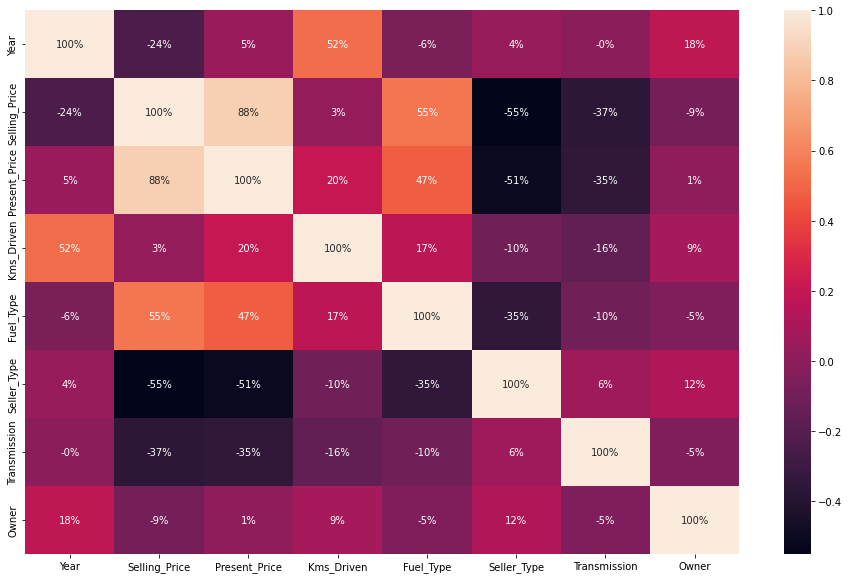

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation 
corr = df.corr()
top_corr_feat = corr.index
plt.figure(figsize=(16, 10))
sns.heatmap(df[top_corr_feat].corr(), annot=True, fmt='.0%')

In [155]:
# WRAPPER METHODS
# 1.) Step Forward Selection
"""Forward selection is an iterative method in which we start with having no feature in the model. In each iteration,
we keep adding the feature which best improves our model till an addition of a new variable does not improve the 
performance of the model."""
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

In [156]:
# X and y features
X = df.drop(columns='Selling_Price')
y = df['Selling_Price']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-01-12 13:56:46] Features: 1/7 -- score: -5.880366486332046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-01-12 13:56:46] Features: 2/7 -- score: -4.238891109017322[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-01-12 13:56:46] Features: 3/7 -- score: -3.589321872879764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

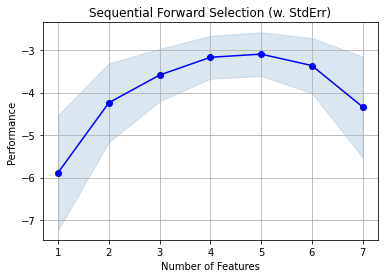

In [157]:
""" ATTEMPTING LINEAR REGRESSION FIRST SCORE IS AROUND: -4.33"""
model = LinearRegression() #instantiate our model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=0)

#build step forward feature selection
sffs = sfs(model,
           k_features=7,
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error', 
           verbose = 2,
           cv=5)
sffs = sffs.fit(X_train,y_train)

#plot our feature importance for best scores
fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [158]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
tree_rg = ExtraTreesRegressor()
tree_rg.fit(X_train, y_train)
tree_rg.feature_importances_

array([6.42574157e-02, 4.00077335e-01, 2.84179203e-02, 2.50668242e-01,
       1.47467463e-01, 1.08934285e-01, 1.77338610e-04])

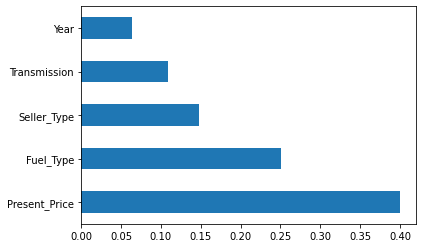

In [159]:
feat_importances = pd.Series(tree_rg.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s finished

[2022-01-12 13:56:49] Features: 1/7 -- score: -6.2636334584339[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s finished

[2022-01-12 13:56:51] Features: 2/7 -- score: -3.9915537210863072[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished

[2022-01-12 13:56:53] Features: 3/7 -- score: -4.001864185204167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

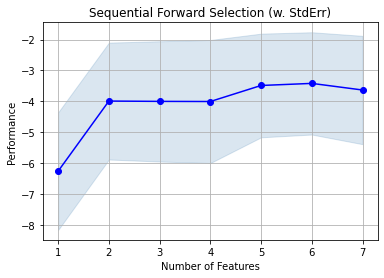

In [160]:
""" ATTEMPTING RANDOM FOREST REGRESSOR FIRST SCORE IS AROUND: -3.58"""
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor() #instantiate our model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=0)

#build step forward feature selection
sffs = sfs(model,
           k_features=7,
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error', 
           verbose = 2,
           cv=5)
sffs = sffs.fit(X_train,y_train)

#plot our feature importance for best scores
fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [161]:
import numpy as np
# The model with Random Forest worked best with a score of -3.5 (the closer to 0 the better with our scoring)
model = RandomForestRegressor()
# hyperparamteres

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop= 1200, num = 12)] 
#number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
#minimum number of sammples required to split a node
min_samples_split=[2,5,10,15,100]
#minumim number of samples required at each leaf node 
min_samples_leaf = [1,2,5,10]


In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [164]:
rf_random = RandomizedSearchCV(estimator=model, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [165]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [166]:
predictions = rf_random.predict(X_test)

In [167]:
predictions

array([ 7.06869,  0.53239,  4.96111,  9.18729, 15.85324,  4.94179,
        3.39136,  0.73878,  4.73287,  4.54535,  3.10871,  0.86634,
        4.90888,  8.0448 ,  7.90406, 11.38926,  7.44512,  4.16437,
        0.49762,  1.4889 ,  4.25846,  4.64579,  5.88482,  9.67352,
        0.23592,  0.76205,  0.48138,  0.65384,  0.49064,  5.20789,
        4.77295,  5.86295,  0.48969,  8.54938,  3.58635,  1.17245,
        5.68238,  6.99114,  0.26085,  9.19565,  8.89533, 19.40695,
        4.88547,  4.13895,  5.4985 , 11.64815,  0.32569,  0.87803,
        5.04525,  8.24016,  7.88401,  3.43125,  4.88575, 20.80258,
        1.11355,  1.07231,  0.51289,  2.7294 ,  3.6467 ,  1.25966,
        3.97159,  8.79337,  3.21343, 20.58415,  4.19958,  5.56279,
       10.32907,  5.10395,  0.53692,  2.9781 ,  3.33444,  3.0644 ,
        0.61604,  5.44355,  1.13475,  2.7939 ,  0.51358,  9.28538,
        1.35961,  2.74895,  0.49225, 10.63647,  6.97511,  5.63732,
        5.32002,  0.94169,  5.97492,  6.13033,  0.46117,  4.92

/Users/munjismac/.pyenv/versions/3.8.12/envs/carprediction/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

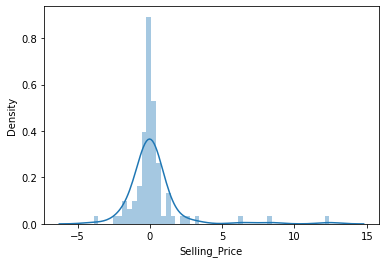

In [168]:
sns.distplot(y_test - predictions)

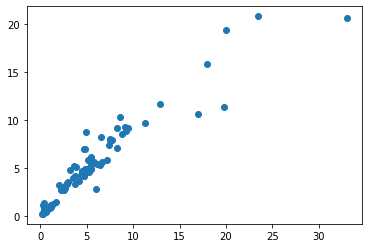

In [169]:
plt.scatter(y_test,predictions)

In [170]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [173]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,5.59,27000,0.0,0.0,1.0,0
1,7,9.54,43000,1.0,0.0,1.0,0
2,3,9.85,6900,0.0,0.0,1.0,0
3,9,4.15,5200,0.0,0.0,1.0,0
4,6,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...
296,4,11.60,33988,1.0,0.0,1.0,0
297,5,5.90,60000,0.0,0.0,1.0,0
298,11,11.00,87934,0.0,0.0,1.0,0
299,3,12.50,9000,1.0,0.0,1.0,0
